In [1]:
# import numpy as np
# import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(801, 20532)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
y = pd.read_csv('labels.csv')
print(y.shape)
y.head()

(801, 2)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
y['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

# Refining the sample data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [7]:
df.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

In [8]:
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


# View the labels in the variable

In [9]:
y = y['Class']
print(y)

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

# y = le.transform(y)

In [11]:
print(y)

[4 3 4 4 0 4 2 4 0 4 0 2 4 0 0 0 3 2 2 4 0 2 3 0 2 3 1 0 0 0 0 0 2 0 4 0 2
 3 0 0 2 4 4 2 2 0 4 1 0 3 0 3 0 4 1 0 0 1 2 0 3 2 0 3 4 1 0 4 2 0 2 0 0 3
 0 3 0 2 4 1 0 4 0 0 4 4 0 0 2 0 4 4 0 0 0 4 1 0 4 0 0 2 0 2 3 2 3 1 3 3 4
 0 3 4 0 2 2 2 0 0 3 2 3 0 4 4 4 0 2 3 1 0 1 0 0 2 3 0 2 1 0 4 0 2 3 1 4 0
 3 3 3 3 0 0 3 0 0 4 4 3 4 3 2 0 4 3 1 2 3 0 2 3 0 3 0 0 0 4 0 2 1 2 0 4 4
 4 3 3 0 3 3 2 3 4 3 0 0 0 3 3 0 2 2 2 2 4 0 4 0 3 3 0 4 0 4 0 0 0 3 0 2 3
 2 2 3 0 2 4 0 3 3 4 1 0 2 4 2 1 0 2 2 3 4 4 3 3 2 0 0 1 0 4 1 0 4 2 4 4 4
 0 1 1 3 1 1 4 3 0 0 2 2 0 1 4 2 4 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 4 0 0 1 3 4 0 0 0 1 0 4 0 1 3 3 4 2 0 2 2 3 1 2 0 0 0 0 2 0 0 4 0 2
 0 3 4 2 0 4 1 0 0 0 3 3 3 0 0 4 3 0 2 0 1 1 3 0 2 0 0 0 1 3 1 2 4 2 0 0 2
 0 1 4 3 4 0 2 4 0 1 2 2 1 1 4 0 0 1 2 0 4 0 0 0 3 3 2 3 0 2 1 4 0 3 4 0 0
 0 3 0 0 4 0 4 1 0 3 0 0 3 0 0 0 2 3 4 0 4 2 0 2 1 0 4 3 2 0 0 2 0 3 0 0 4
 1 0 2 3 4 0 4 0 0 0 0 2 3 0 2 0 0 3 3 2 1 4 1 0 2 2 0 4 2 1 3 3 0 4 4 0 4
 3 2 4 0 3 4 3 0 0 1 3 2 

In [12]:
print(y.shape)

(801,)


In [13]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [16]:
cols = df.columns

In [17]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df = ms.fit_transform(df)

In [18]:
df = pd.DataFrame(df, columns=[cols])

In [19]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,0.323424,0.538556,0.091637,0.683650,0.0,0.478004,0.212979,0.0,0.0,...,0.421592,0.346028,0.397941,0.784147,0.298401,0.633365,0.511542,0.213546,0.442221,0.0
1,0.0,0.095034,0.261965,0.503271,0.406563,0.0,0.425094,0.000000,0.0,0.0,...,0.353806,0.145807,0.404515,0.679510,0.105995,0.777134,0.720519,0.309838,0.141369,0.0
2,0.0,0.563050,0.713649,0.365706,0.491410,0.0,0.448090,0.162862,0.0,0.0,...,0.461958,0.327250,0.845362,0.586653,0.504772,0.000000,0.544738,0.449794,0.102625,0.0
3,0.0,0.587397,0.743409,0.322208,0.602881,0.0,0.576451,0.156488,0.0,0.0,...,0.655419,0.477651,0.555750,0.971253,0.423872,0.502650,0.522173,0.367733,0.254246,0.0
4,0.0,0.425802,0.465334,0.298847,0.446039,0.0,0.388397,0.129896,0.0,0.0,...,0.639042,0.499893,0.643439,0.779926,0.487912,0.616085,0.407093,0.322636,0.425599,0.0


In [20]:
from sklearn_som.som import SOM

In [21]:
som = SOM(m=5, n=1, dim=20531)
som.fit(df.values)

In [22]:
predictions = som.predict(df.values)
# print(predictions)

In [23]:
label = som.fit_predict(df.values)
 


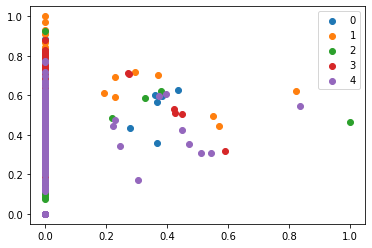

In [24]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

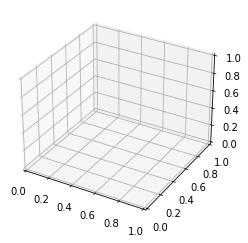

In [26]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

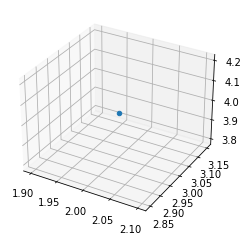

In [27]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(2,3,4) # plot the point (2,3,4) on the figure

plt.show()

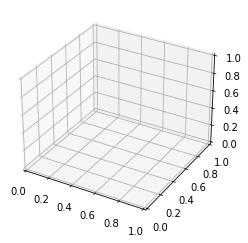

In [28]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    ax.scatter3D(df.iloc[label == i , 0] , df.iloc[label == i , 1] , label = i, cmap='Greens');
fig = plt.figure()
ax = plt.axes(projection='3d')

In [29]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib notebook
%matplotlib inline

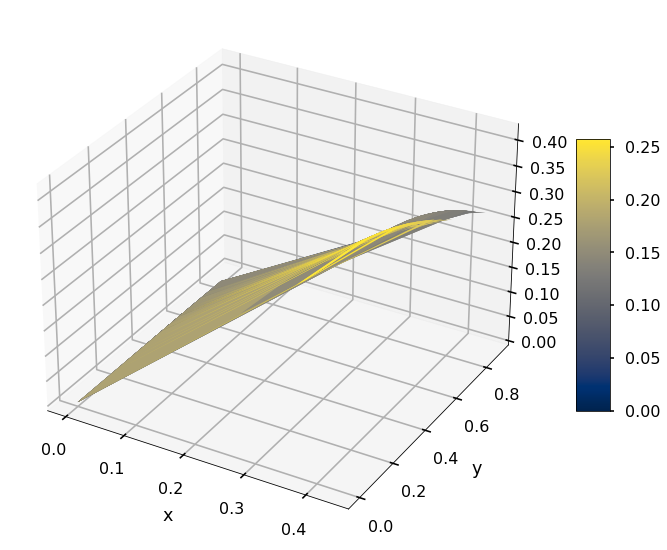

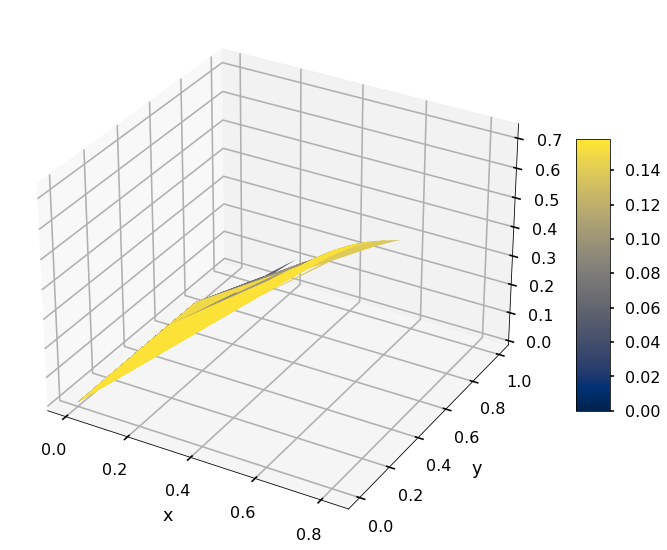

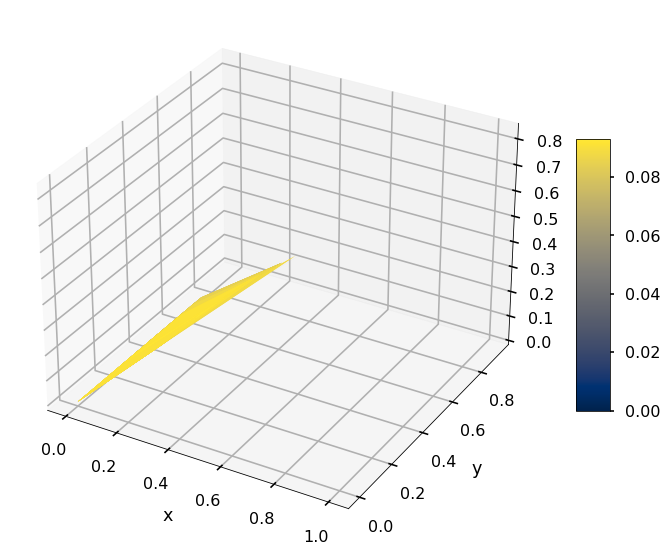

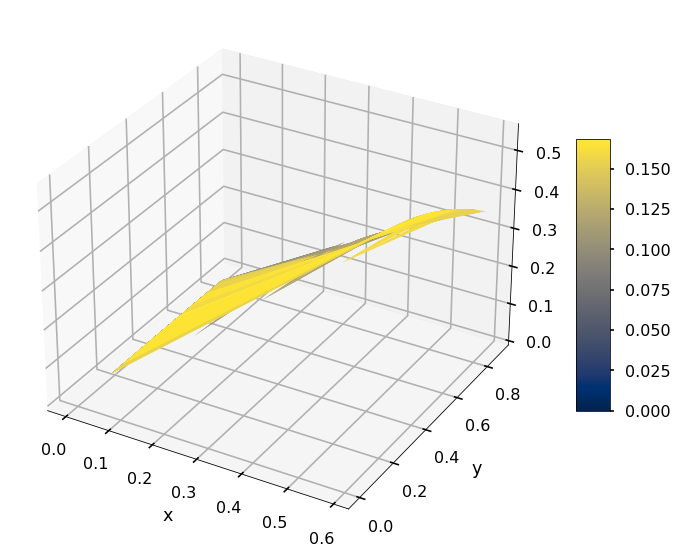

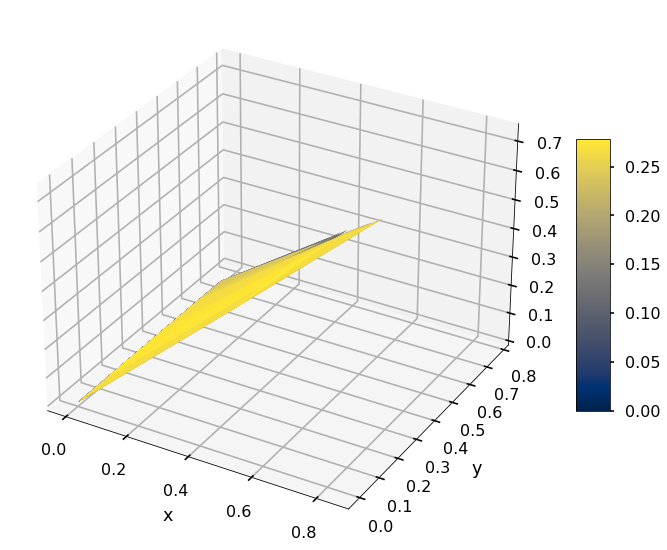

In [30]:
# np.random.seed(42)
# xs = np.random.random(100)*10+20
# ys = np.random.random(100)*5+7
# zs = np.random.random(100)*15+50
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs,ys,zs)
# plt.show()
# fig = plt.figure(figsize = (10,10))
# ax = plt.axes(projection='3d')
# plt.show()


u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    fig = plt.figure(figsize = (12,10))
    ax = plt.axes(projection='3d')
    xs = df.iloc[label == i , 0]
    ys = df.iloc[label == i , 1]
    X, Y = np.meshgrid(xs, ys)
    Z = np.sin(X)*np.cos(Y)
    surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)
    fig.colorbar(surf, shrink=0.5, aspect=8)
    plt.show()

In [31]:
from sklearn import metrics

In [32]:
metrics.silhouette_score(df,predictions)

0.15839759819801977

In [33]:
metrics.calinski_harabasz_score(df,predictions)

82.0256608046

In [34]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df, predictions)

2.284763604892282

In [35]:
metrics.adjusted_rand_score(y,predictions)

0.8327421445825723

In [36]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(y, predictions)

0.8722680571342055

In [37]:
from sklearn.metrics import rand_score
metrics.rand_score(y, predictions)

0.9403089887640449

In [38]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score (y, predictions)

0.8363488835613141

In [39]:
metrics.homogeneity_score(y, predictions)

0.8493428008241035

In [40]:
metrics.completeness_score(y, predictions)

0.8258390482580202

In [41]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y, predictions)

0.8374260390437082

In [42]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(y, predictions)

0.8363488835613141

In [43]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y, predictions)

0.8327421445825723